In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
salaries = pd.read_csv('Salaries.csv')

#Task 1.1: Basic Data Exploration
Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

In [16]:
#Number of columns and rows
numOrow = salaries.shape[0]
numOcol = salaries.shape[1]
print("Number of rows is: ",numOrow)
print("Number of columns is: ",numOcol)

#Data type and missing data
dataTypes = salaries.dtypes
print("\nData Type Of Each Column:\n\n",dataTypes)

#find the missing values and count them in each column
columns = salaries.columns
print("\n")
for i in range(numOcol):
  numOmissing = salaries[columns[i]].isnull().sum()
  print("Num of Missing values in", columns[i], "is: ", numOmissing)

Number of rows is:  148654
Number of columns is:  13

Data Type Of Each Column:

 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


Num of Missing values in Id is:  0
Num of Missing values in EmployeeName is:  0
Num of Missing values in JobTitle is:  0
Num of Missing values in BasePay is:  609
Num of Missing values in OvertimePay is:  4
Num of Missing values in OtherPay is:  4
Num of Missing values in Benefits is:  36163
Num of Missing values in TotalPay is:  0
Num of Missing values in TotalPayBenefits is:  0
Num of Missing values in Year is:  0
Num of Missing values in Notes is:  148654
Num of Missing values in Agency is:  0
Num of Missing values in Status is: 

# Task 1.2: Descriptive Statistics
Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [12]:
print(salaries['TotalPay'].describe())
median = salaries['TotalPay'].median()
min = salaries['TotalPay'].min()
max = salaries['TotalPay'].max()
mode = salaries['TotalPay'].mode()[0]
print("median   ",median)
print("mode   ",mode)
print("Range of salaries is fom",min, "to",max)


count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64
median    71426.60999999999
mode    0.0
Range of salaries is fom -618.13 to 567595.43


# Task 1.3: Data Cleaning
 Handle missing data by suitable method with explain why you use it.

In [17]:
#replace messung values by mean values

columns=salaries.columns
for i in range(numOcol):
  if salaries[columns[i]].dtypes == 'float64':
    mean = salaries[columns[i]].mean()
    salaries[columns[i]].fillna(mean, inplace=True)
    '''imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
    cleared_data = imputer.fit_transform(np.array(salaries[columns[i]]).reshape(-1, 1))
    salaries[columns[i]]= pd.series(cleared_data)'''
salaries = salaries.dropna(axis=1)
#columns=salaries.columns


# Task 1.3: Basic Data Visualization
Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

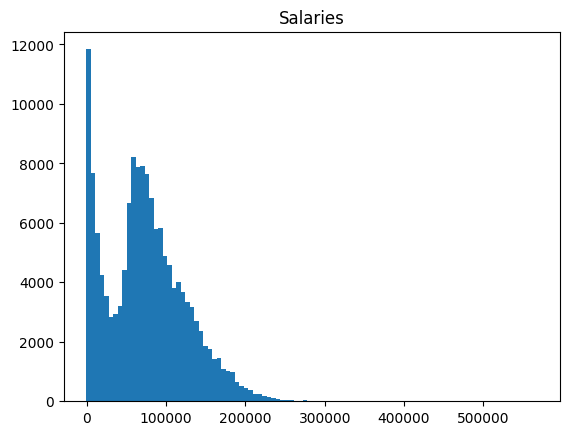

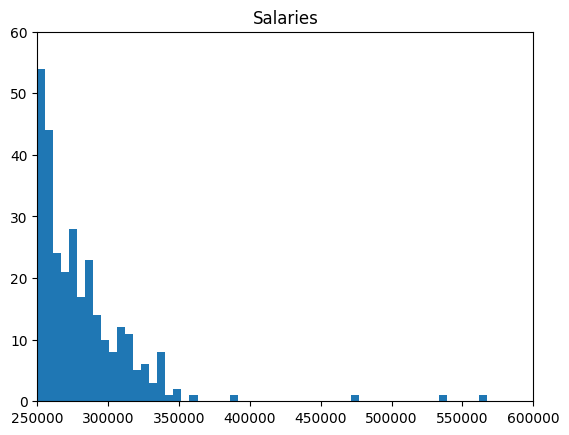

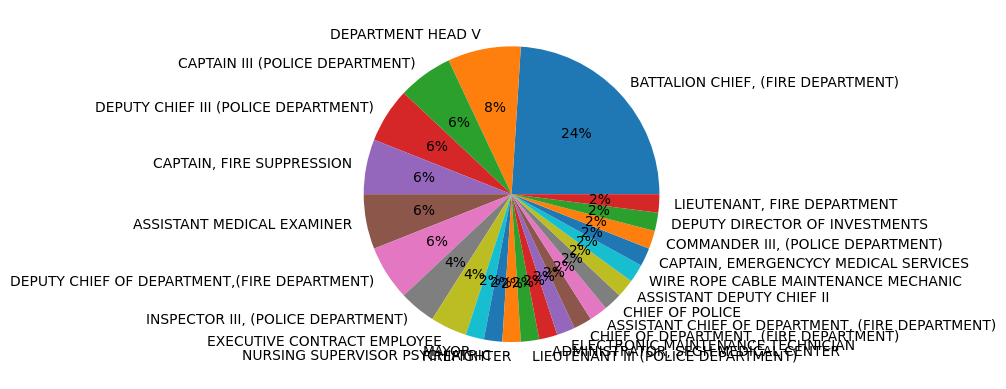

In [8]:
plt.title("Salaries")
plt.hist(salaries['TotalPay'],bins=100)
plt.show()
plt.title("Salaries")
plt.hist(salaries['TotalPay'],bins=100)
plt.xlim(250000,600000)
plt.ylim(0,60)
plt.show()
#no departement in data so i used a sample of 50
salaries_upper= salaries.loc[1:50,'JobTitle'].str.upper()
jobsCount = salaries_upper.value_counts()
plt.pie(jobsCount, labels=jobsCount.index,autopct='%1.0f%%')
plt.show()

#count('Lifeguard').sum() + salaries['JobTitle'].str.count('LIFEGUARD').sum())

# Task 1.4: Grouped Analysis
Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [9]:
groupByYear = salaries.groupby('Year')
print(groupByYear['TotalPay'].describe())


        count          mean           std     min         25%        50%  \
Year                                                                       
2011  36159.0  71744.103871  47498.706594    0.00  36810.7600  68213.240   
2012  36766.0  74113.262265  49523.904319    0.00  37560.6075  70714.680   
2013  37606.0  77611.443142  52854.774783    0.00  36754.9950  74500.015   
2014  38123.0  75463.918140  51697.713029 -618.13  33436.2100  72359.980   

             75%        max  
Year                         
2011  102512.680  567595.43  
2012  104099.170  362844.66  
2013  109637.670  347102.32  
2014  107974.445  471952.64  


# Task 1.5: Simple Correlation Analysis
Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

0.5048439903995623


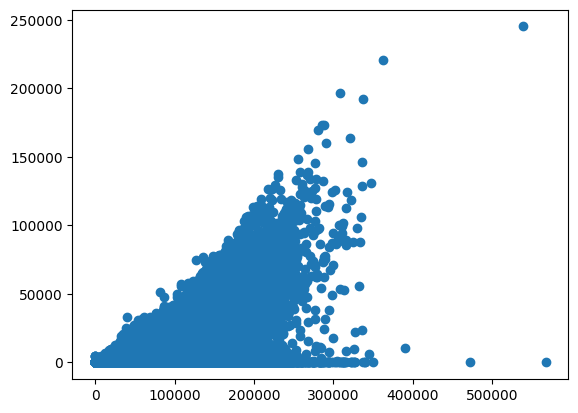

In [ ]:
corelation = salaries['TotalPay'].corr(salaries['OvertimePay'])
print('correlation between Total Pay and Overtime',corelation)
plt.scatter(salaries['TotalPay'],(salaries['OvertimePay']))